In [ ]:
핵심모듈 : 모델과 레이어를 생성하기 위한 기능
    - 활성화 모듈 : softmax, relu
    - Loss 모듈 : error 모듈 손실 기능
    - Optimizer 모듈 : 최적화 기능을 수행, sgd 등
    - 정규화 : L1정규화, L2정규화

In [ ]:
lelu 함수
2D 텐서를 입력 받고 입력텐서의 기능을 변환하는 3개의 텐서 연산을 한다.
입력 텐서 w 사이에 접곱(dot), 접곱을 결과인 2D텐서와 벡터 b 사이의 덧셈을 구한다
relu(x)는 max(x,0)
output = relu(dot(w,input)+b)
w : 2d tenser, b : vector

In [1]:
# 21. relu(렐루) 함수를 살펴보자
# 모델, 층, 핵심모듈
# layers (입력 레이어, 히든 레이어, 출력 레이어) : 코어, 컨볼루션, 폴링, 반복
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model

In [66]:
import numpy as np

def naive_relu(x):
    assert len(x.shape) == 2
    x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

            
res = naive_relu(np.array([[1,2,3,4],[5,6,7,8]]))
res

x = [1,2,3,4]
y = [4,5,6,7]
z = x + y   # 원소별 덧셈

z = np.maximum(z, 0.)  # 원소별 렐루 함수
z

array([1., 2., 3., 4., 4., 5., 6., 7.])

In [ ]:
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
# 레이어 매개인자 : 입력데이터, 레이어 수(뉴런 수 / 단위), 초기값, 정규화, 제약, 활성화

In [7]:
# exam01) 모든 입력 데이터에 0으로 설정해서 계층을 생성하자
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from keras import *

my_init = initializers.Zeros()
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_initializer=my_init))
model

In [4]:
# exam02) 모든 입력 데이터에 1로 설정해서 계층을 생성하자
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from keras import *

my_init = initializers.Ones()
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_initializer=my_init))
model

In [5]:
# exam03) 입력 데이터의 정규 분포를 사용하여 값을 생성하자

my_init = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_initializer=my_init))
model

In [6]:
# exam04) 지정한 배율과 레이어의 입력모양, 출력 모양을 기반으로 값을 생성
# fan_in : 입력장치, fan_out : 출력모양, fan_avg
my_init = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='truncated_normal', seed=None)

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_initializer=my_init))
model

In [2]:
# exam05) kernel_constrain
# 최적화 단계에서 매개변수(가중치)에 대한 제약 조건이 설정된다. 레이어에 대한 제약조건 사용할때
# 가중치가 음수가 아닌것을 제안하자  / 표준으로 / 주어진 값이 작거나 같은 값으로 제안하자
from keras import constraints

my_const = constraints.UnitNorm(axis=0)

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_constraint=my_const))
model

tf.Tensor(3.0, shape=(), dtype=float32)
2.0


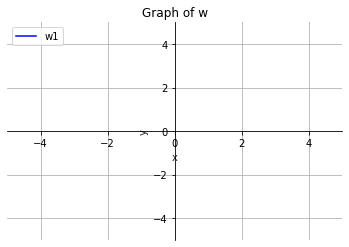

In [20]:
import tensorflow as tf
from matplotlib import pyplot as plt

tf.executing_eagerly()   # 계산 그래프를 즉시 실행. executing_eagerly 사용

x = tf.constant(3.0)
print(x)

with tf.GradientTape() as g:   # with 내부 계산을 기록
    g.watch(x)   # x를 기록
    y = 2 * x   # 미분 방정식
    
print(g.gradient(y, x).numpy())   # x = 3 일 때의 y 기울기를 구한다

fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y, '-b', label='w1')
plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
plt.title('Graph of w')
plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
plt.grid()  # 격자모양출력
plt.show()

In [ ]:
x = np.linspace(-2,2,50)  # 직선의 시작점 끝점
y = -(x * w[1]/w[2]) + (w[0]/w[2])  # 최종 가중치 직선의 방정식

fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y, '-b', label='w1')
plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
plt.title('Graph of w')
plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
plt.grid()  # 격자모양출력
plt.show()

In [18]:
x = tf.Variable(3.0)

with tf.GradientTape() as g:
    y = x * x
    
g.gradient(y, x).numpy()

6.0

In [21]:
def with_if(x):
    if x <= 0:
        return x * 2   # 기울기가 2
    else:
        return x * x * x   # 3*x*x
    
def with_if_gradient(n):
    x = tf.Variable(n)
    with tf.GradientTape() as g:
        y = with_if(x)
    print('n = %.1f : gradient = %.1f' % (n, g.gradient(y, x)))
    
with_if_gradient(-3.0)
with_if_gradient(0.0)
with_if_gradient(3.0)

n = -3.0 : gradient = 2.0
n = 0.0 : gradient = 2.0
n = 3.0 : gradient = 27.0


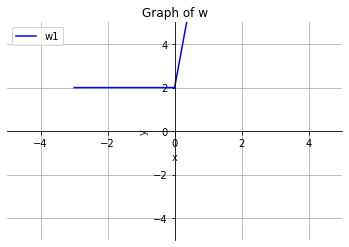

In [25]:
def Test(x,y):
    fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.

    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x, y, '-b', label='w1')
    plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
    plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
    plt.title('Graph of w')
    plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
    plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
    plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
    plt.grid()  # 격자모양출력
    plt.show()
    
x = [-3.0, 0.0, 3.0]
y = [2.0, 2.0, 27.0]
Test(x,y)

In [22]:
a = tf.Variable(3.0)
b = tf.Variable(4.0)

with tf.GradientTape() as g:
    f = a ** 2 + 5 * b  # 다변량 미분 공식
    
g.gradient(f, [a,b])

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [23]:
a = tf.Variable(3.0)
b = tf.Variable(4.0)

with tf.GradientTape() as g:
    f = a ** 2 + 5 * b  # 다변량 미분 공식
    
g.gradient(f, [b, [a]])

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 [<tf.Tensor: shape=(), dtype=float32, numpy=6.0>]]

In [34]:
# exam) 모델 생성
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
# model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_initializer=my_init))
# model

input_layer = Dense(32, input_shape=(8,))
model.add(input_layer)

hidden_layer = Dense(64, activation='relu')
model.add(hidden_layer)

output_layer = Dense(8)
model.add(output_layer)

layers = model.layers
print(layers, '\n')

inputs = model.inputs  # 모델의 모든 입력텐서 반환
print(inputs, '\n')

output = model.outputs
print(output, '\n')

# model.get_weights() - 모든 가중치를 numpy 배열로 반환한다
# model.set_weights()

[<tensorflow.python.keras.layers.core.Dense object at 0x000002443F77CA30>, <tensorflow.python.keras.layers.core.Dense object at 0x000002443F77C880>, <tensorflow.python.keras.layers.core.Dense object at 0x000002443F785970>] 

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_18_input')>] 

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_20')>] 



In [32]:
model = Sequential()
input_layer = Dense(4, input_shape=(4,))
model.add(input_layer)
model.get_weights()

[array([[-0.01072127, -0.5581951 , -0.3344441 , -0.5136783 ],
        [-0.7478444 , -0.38731325, -0.21212035,  0.19002408],
        [-0.36694992, -0.5654199 , -0.03335154, -0.01171774],
        [-0.41603246,  0.27861363, -0.8595214 , -0.8241571 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [39]:
from keras.models import model_from_json

# 모델의 직렬화

config = model.get_config()
config

# 로드
json_string = model.to_json()
json_string

new_model = model_from_json(json_string)
new_model

# 모델값을 문자열로
res = model.to_yaml()
res

# 모델을 요약
model.summary()

# 모델 훈련 및 예측
# 컴파일(모델의 학습과정) -> fit(훈련데이터로 모델 훈련) -> 평가(테스트데이터로 모델평가) -> 예측(새로운 입력에 대한 결과를 예측)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
Total params: 2,920
Trainable params: 2,920
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 모델 생성 연습
from keras.layers import Input

data = Input(shape=(2,3))
layer = Dense(2)(data)
print(layer)

model = Model(inputs=data, outputs=layer)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2), dtype=tf.float32, name=None), name='dense_25/BiasAdd:0', description="created by layer 'dense_25'")
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 2, 3)]            0         
_________________________________________________________________
dense_25 (Dense)             (None, 2, 2)              8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [ ]:
compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    weighted_metrics=None, run_eagerly=None, steps_per_execution=None, **kwargs
)

fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)

In [ ]:
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version

summary = SummaryWriter()
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Epoch 1/5
4/4 [==============================] - 14s 2s/step - loss: 11.7796 - accuracy: 0.1114 - val_loss: 11.5518 - val_accuracy: 0.1100
Epoch 2/5
4/4 [==============================] - 0s 57ms/step - loss: 11.7883 - accuracy: 0.1233 - val_loss: 11.5554 - val_accuracy: 0.1050
Epoch 3/5
4/4 [==============================] - 0s 52ms/step - loss: 11.7292 - accuracy: 0.1217 - val_loss: 11.5598 - val_accuracy: 0.0975
Epoch 4/5
4/4 [==============================] - 0s 61ms/step - loss: 11.8099 - accuracy: 0.1074 - val_loss: 11.5655 - val_accuracy: 0.0925
Epoch 5/5
4/4 [==============================] - 0s 52ms/step - loss: 11.8290 - accuracy: 0.1251 - val_loss: 11.5725 - val_accuracy: 0.0925
<class 'tensorflow.python.keras.callbacks.History'>
[11.753506660461426, 11.757205963134766, 11.7623929977417, 11.768101692199707, 11.77550983428955]
[0.11500000208616257, 0.11999999731779099, 0.11749999970197678, 0.11749999970197678, 0.11749999970197678]
[11.551839828491211, 11.555397033691406, 11.5

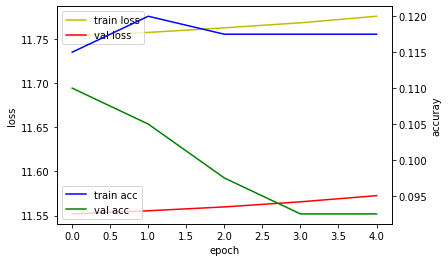

In [65]:
# 간단한 모델 컴파일 해보자
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version

summary = SummaryWriter()
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# 임의의 데이터
x_train = np.random.random((100,4,8))
y_train = np.random.random((100,4,10))

# 임의의 유효성 검사 데이터
x_val = np.random.random((100,4,8))
y_val = np.random.random((100,4,10))

# 순차 모델링
model = Sequential()

# 모델 추가, 레이어 추가
model.add(LSTM(16, return_sequences=True))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 데이터 훈련
hist = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val), callbacks=[tensorboard_callback])
hist
print(type(hist))
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

# fit() 히스토리 기능
'''
loss : 훈련 손실값
accuracy : 정확도
val_loss : 검증 손실값
val_accuracy : 검증 정확도
'''

# C:\Users\USER>tensorboard --logdir C:\Users\USER\MyPython\DL\logs

# 그래프로 확인

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
One-Hot Encoding : 사람이 인식할 수 있는 데이터를 숫자로 변환 정렬 시켜서 컴퓨터에게 주입시킨다.
  Data -> 숫자
  단어 -> 숫자
  딥러닝 : 문자열 -> 분철 -> 숫자인덱싱 -> 원핫 인코딩

In [77]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

str = "저는 하루 이상 휴일을 좋아합니다. 그 중 저는 목요일을 가장 좋아한다. 좋아하는 날에 대면을 가나봐요 여러분은?"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([str])
print(tokenizer.word_index)  # 공백 기준

{'저는': 1, '하루': 2, '이상': 3, '휴일을': 4, '좋아합니다': 5, '그': 6, '중': 7, '목요일을': 8, '가장': 9, '좋아한다': 10, '좋아하는': 11, '날에': 12, '대면을': 13, '가나봐요': 14, '여러분은': 15}


In [78]:
encode = tokenizer.texts_to_sequences([str])
encode

[[1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 10, 11, 12, 13, 14, 15]]

In [79]:
onehot = tf.keras.utils.to_categorical(encode)
print(onehot)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]


In [80]:
onehot = tf.keras.utils.to_categorical(encode,30)
print(onehot)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [82]:
# exam) 모델링 학습을 해보자
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import backend as K
from sklearn.utils import shuffle
import tensorflow as tf

In [94]:
# 1. 데이터 로드
test = pd.read_csv('C:\\Users\\USER\\MyPython\\DL\\titanic\\test.csv')
train = pd.read_csv('C:\\Users\\USER\\MyPython\\DL\\titanic\\train.csv')

train_x = train.drop('Survived', axis=1)
train_y = train["Survived"]

test_x = test

# 결측값 삭제하기
train_x = train_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# 결측값을 채우기
train_age_median = train_x['Age'].median()
train_x['Age'] = train_x['Age'].fillna(train_age_median)
train_x['Embarked'] = train_x['Embarked'].fillna('S')

# test 결측값 채우기
test_age_median = test_x['Age'].median()
test_x['Age'] = test_x['Age'].fillna(train_age_median)

test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].describe()[5])

# 더미 컬럼 생성
train_x_dummy = pd.get_dummies(train_x, columns=['Sex','Embarked'])
test_x_dummy = pd.get_dummies(train_x, columns=['Sex','Embarked'])

# one-hot
train_y_onehot = np_utils.to_categorical(train_y)

train_x_dummy_array = train_x_dummy.values.astype('float32')

In [96]:
# 2. 모델 생성
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

# 3. 컴파일
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='sgd', loss='mse', metrics=[tf.keras.metrics.Recall()])

# 4. fit()
mycall = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
model.fit(train_x_dummy_array, train_y_onehot, epochs=10, batch_size=32, callbacks=[mycall])

# 5. 저장
model.save('res.h5')

Epoch 1/10
28/28 [==============================] - 4s 3ms/step - loss: 22.7858 - accuracy: 0.4817
Epoch 2/10
28/28 [==============================] - 0s 8ms/step - loss: 6.0072 - accuracy: 0.5368
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 3.9398 - accuracy: 0.5182
Epoch 4/10
28/28 [==============================] - 0s 7ms/step - loss: 3.8525 - accuracy: 0.5716
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 3.1034 - accuracy: 0.6223
Epoch 6/10
28/28 [==============================] - 0s 9ms/step - loss: 3.9571 - accuracy: 0.5948
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: 4.0942 - accuracy: 0.5582
Epoch 00007: early stopping


In [ ]:
res = pd.read_hdf('res.h5')
res